
# SVM: Weighted samples

Plot decision function of a weighted dataset, where the size of points
is proportional to its weight.

The sample weighting rescales the C parameter, which means that the classifier
puts more emphasis on getting these points right. The effect might often be
subtle.
To emphasize the effect here, we particularly increase the weight of the positive
class, making the deformation of the decision boundary more visible.


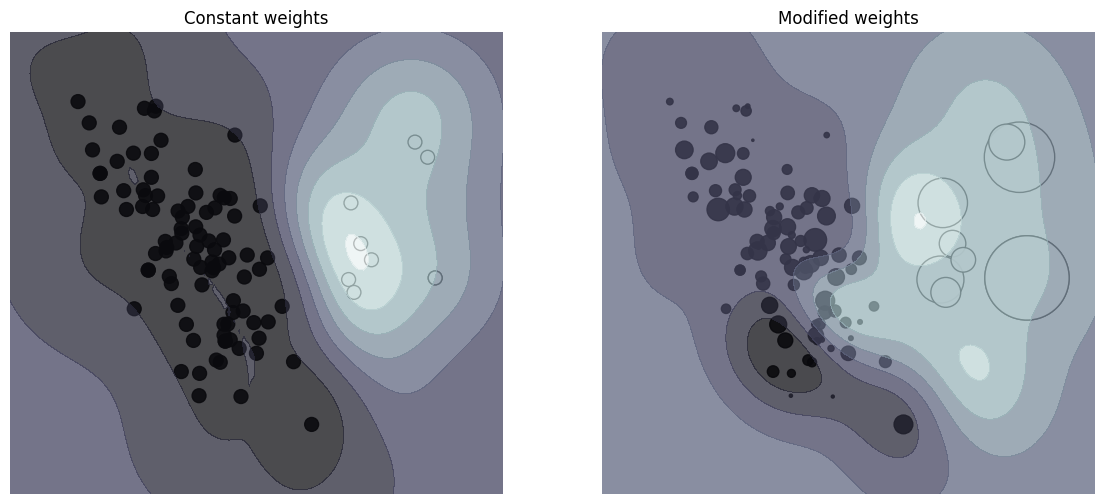

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import make_classification
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.svm import SVC

X, y = make_classification(
    n_samples=1_000,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=1,
    class_sep=1.1,
    weights=[0.9, 0.1],
    random_state=0,
)
# down-sample for plotting
rng = np.random.RandomState(0)
plot_indices = rng.choice(np.arange(X.shape[0]), size=100, replace=True)
X_plot, y_plot = X[plot_indices], y[plot_indices]


def plot_decision_function(classifier, sample_weight, axis, title):
    """Plot the synthetic data and the classifier decision function. Points with
    larger sample_weight are mapped to larger circles in the scatter plot."""
    axis.scatter(
        X_plot[:, 0],
        X_plot[:, 1],
        c=y_plot,
        s=100 * sample_weight[plot_indices],
        alpha=0.9,
        cmap=plt.cm.bone,
        edgecolors="black",
    )
    DecisionBoundaryDisplay.from_estimator(
        classifier,
        X_plot,
        response_method="decision_function",
        alpha=0.75,
        ax=axis,
        cmap=plt.cm.bone,
    )
    axis.axis("off")
    axis.set_title(title)


# we define constant weights as expected by the plotting function
sample_weight_constant = np.ones(len(X))
# assign random weights to all points
sample_weight_modified = abs(rng.randn(len(X)))
# assign bigger weights to the positive class
positive_class_indices = np.asarray(y == 1).nonzero()[0]
sample_weight_modified[positive_class_indices] *= 15

# This model does not include sample weights.
clf_no_weights = SVC(gamma=1)
clf_no_weights.fit(X, y)

# This other model includes sample weights.
clf_weights = SVC(gamma=1)
clf_weights.fit(X, y, sample_weight=sample_weight_modified)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))
plot_decision_function(
    clf_no_weights, sample_weight_constant, axes[0], "Constant weights"
)
plot_decision_function(clf_weights, sample_weight_modified, axes[1], "Modified weights")

plt.show()